In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import re
#from scipy.stats import f_oneway
import scipy.stats
from scipy.special import polygamma
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import dirichlet
import attila_utils

In [2]:
treatments_CO26990 = {
    'A': 'Saline WT',
    'B': 'Saline TG',
    'C': 'Amiloride TG',
}


fpath = '../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx'
data_CO26990 = pd.read_excel(fpath, sheet_name='rawdata MWM day 5', index_col='IRN')
data_CO26990['Condition'] = data_CO26990.Group.apply(lambda x: treatments_CO26990[x])
data_CO26990

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
12913 A,I,A,f,2,18.90810,60.31960,5.19308,15.57920,Saline WT
12915 A,I,A,f,2,25.56590,19.30760,28.09590,27.03060,Saline WT
12937 A,II,A,f,2,20.90550,50.19970,10.78560,18.10920,Saline WT
12955 A,II,A,f,1,20.10650,21.30490,33.28890,25.29960,Saline WT
12957 A,II,A,f,1,44.60720,16.24500,5.72570,33.42210,Saline WT
12961 A,II,A,f,5,11.85090,62.31690,9.45406,16.37820,Saline WT
12967 A,II,A,f,3,8.38881,37.01730,35.68580,18.90810,Saline WT
12979 A,II,A,f,4,15.57920,47.13720,30.49270,6.79095,Saline WT
14138,I,A,m,3,14.78030,44.20770,26.23170,14.78030,Saline WT


In [3]:
treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx'
data_CO28152 = pd.read_excel(fpath, sheet_name='raw data MWM day 5', index_col='IRN')
data_CO28152['Condition'] = data_CO28152.Group.apply(lambda x: treatments_CO28152[x])
data_CO28152

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
14627 A,I,A,f,1,0.00000,23.5686,63.11580,13.31560,Amiloride TG
14687 A,I,A,f,0,11.31820,24.2344,32.22370,32.22370,Amiloride TG
15117,I,A,f,0,28.76170,27.8296,18.37550,25.03330,Amiloride TG
15119,I,A,f,1,0.00000,15.0466,77.09720,7.85619,Amiloride TG
15121,I,A,f,7,2.26365,62.7164,11.71770,23.30230,Amiloride TG
...,...,...,...,...,...,...,...,...,...
16182,V,J,m,3,14.91340,61.9174,6.12517,16.77760,DMSO WT
16192,V,J,m,1,5.32623,21.4381,45.80560,27.43010,DMSO WT
16220,VI,J,m,4,18.10920,40.2130,16.24500,25.43280,DMSO WT


In [4]:
treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

fpath = '../../resources/QPS/5xFAD-mouse/CO28154-behavioral-data-cleaned.xlsx'
data_CO28154 = pd.read_excel(fpath, sheet_name='Probe Trial day5', index_col='IRN')
data_CO28154['Condition'] = data_CO28154.Group.apply(lambda x: treatments_CO28154[x])
data_CO28154

,Cohort,Group,Sex,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
IRN,,,,,,,,,
15721,II,A,f,1,36.61780,19.5739,25.8322,17.97600,Saline TG
15725,II,A,f,4,4.39414,53.6618,27.8296,14.11450,Saline TG
15891,V,A,f,1,28.09590,22.5033,16.2450,33.15580,Saline TG
15893,V,A,f,1,18.50870,28.6285,26.2317,26.63120,Saline TG
15911,V,A,f,4,20.23970,21.9707,33.4221,24.36750,Saline TG
...,...,...,...,...,...,...,...,...,...
16774,III,L,m,8,8.78828,60.0533,19.9734,11.18510,Vehicle (Arundine) WT
16784,III,L,m,2,22.37020,40.0799,17.7097,19.84020,Vehicle (Arundine) WT
16802,IV,L,m,3,16.91080,40.3462,26.7643,15.97870,Vehicle (Arundine) WT


In [5]:
def extract_data4dirichlet(condition, data=data_CO26990, pseudo_time=0.1):
    a = data.loc[data.Condition == condition, 'SE (%)':'SW (%)'].to_numpy()[:, [1, 2, 3, 0]]
    a += pseudo_time
    return(a)

def my_dirichlet_plot(condition, do_test_uniform=True, data=data_CO26990):
    a = extract_data4dirichlet(condition, data=data)
    figname = 'named-figure/dirichlet-plot-' + re.sub('\W+', '-', condition) + '.png'
    print(figname)
    dirichlet.plot(a, label=condition, do_test_uniform=do_test_uniform, do_MWM_correction=True, verbose=True, save_figure=figname)

def study_plotter(data):
    for condition in data.Condition.unique():
        try:
            my_dirichlet_plot(condition, do_test_uniform=True, data=data)
        except:
            my_dirichlet_plot(condition, do_test_uniform=False, data=data)

named-figure/dirichlet-plot-Saline-WT.png

Result of the Dirichlet uniformity test for group Saline WT:
# likelihood-ratio statistic (with MWM correction) = 14.3782
# p-value = 0.00243308
# MLE params under null hypothesis (uniformity)           :[2.04978545 2.04978545 2.04978545 2.04978545]
# MLE params under alternative hypothesis                 :[4.5717578  2.39881343 2.36860429 2.28969063]
named-figure/dirichlet-plot-Saline-TG.png

Result of the Dirichlet uniformity test for group Saline TG:
# likelihood-ratio statistic (with MWM correction) = 3.95353
# p-value = 0.266526
# MLE params under null hypothesis (uniformity)           :[1.22772303 1.22772303 1.22772303 1.22772303]
# MLE params under alternative hypothesis                 :[1.5331693  1.46249262 1.42230579 0.95904141]
named-figure/dirichlet-plot-Amiloride-TG.png

Result of the Dirichlet uniformity test for group Amiloride TG:
# likelihood-ratio statistic (with MWM correction) = 3.68916
# p-value = 0.297045
# MLE params u

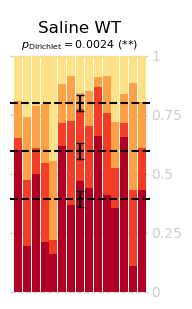

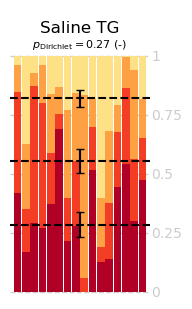

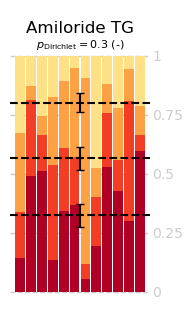

In [6]:
study_plotter(data_CO26990)

named-figure/dirichlet-plot-Amiloride-TG.png

Result of the Dirichlet uniformity test for group Amiloride TG:
# likelihood-ratio statistic (with MWM correction) = 20.2777
# p-value = 0.000148667
# MLE params under null hypothesis (uniformity)           :[0.69213269 0.69213269 0.69213269 0.69213269]
# MLE params under alternative hypothesis                 :[1.74633247 1.69353165 1.36068508 0.42233793]
named-figure/dirichlet-plot-HCQ-TG.png

Result of the Dirichlet uniformity test for group HCQ TG:
# likelihood-ratio statistic (with MWM correction) = 20.8482
# p-value = 0.0001132
# MLE params under null hypothesis (uniformity)           :[1.69701102 1.69701102 1.69701102 1.69701102]
# MLE params under alternative hypothesis                 :[4.6598321  2.33279354 2.12660539 1.82934089]
named-figure/dirichlet-plot-HCQ-nano-TG.png

Result of the Dirichlet uniformity test for group HCQ nano TG:
# likelihood-ratio statistic (with MWM correction) = 12.6621
# p-value = 0.00542724
# MLE params

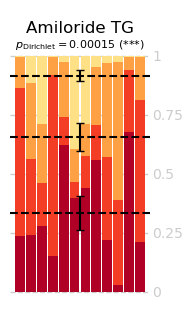

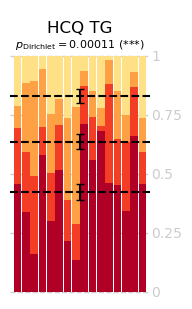

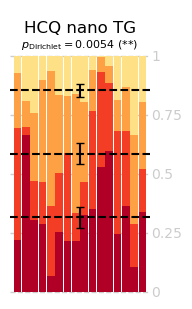

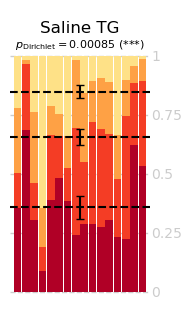

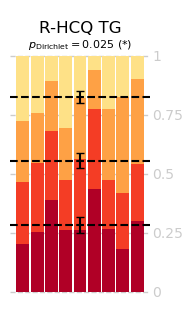

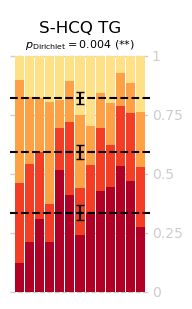

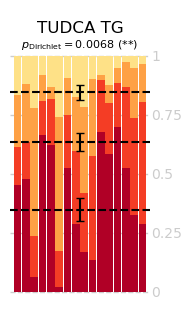

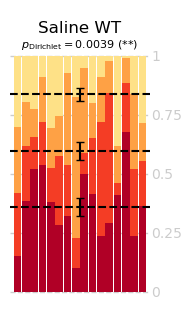

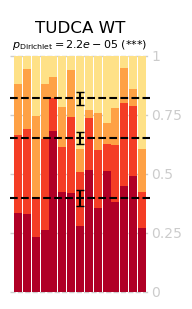

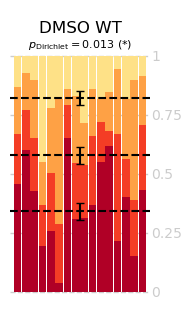

In [7]:
study_plotter(data_CO28152)

named-figure/dirichlet-plot-Saline-TG.png

Result of the Dirichlet uniformity test for group Saline TG:
# likelihood-ratio statistic (with MWM correction) = 19.3693
# p-value = 0.000229301
# MLE params under null hypothesis (uniformity)           :[2.61445932 2.61445932 2.61445932 2.61445932]
# MLE params under alternative hypothesis                 :[6.07356766 4.60731264 3.08143155 2.8750881 ]
named-figure/dirichlet-plot-TUDCA-HCQ-TG.png

Result of the Dirichlet uniformity test for group TUDCA + HCQ TG:
# likelihood-ratio statistic (with MWM correction) = 45.5376
# p-value = 7.11211e-10
# MLE params under null hypothesis (uniformity)           :[1.3524912 1.3524912 1.3524912 1.3524912]
# MLE params under alternative hypothesis                 :[6.71501909 3.31003491 1.98493164 1.74167111]
named-figure/dirichlet-plot-Arundine-low-dose-TG.png

Result of the Dirichlet uniformity test for group Arundine low dose TG:
# likelihood-ratio statistic (with MWM correction) = 13.674
# p-value = 

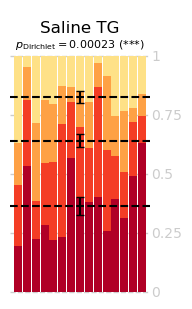

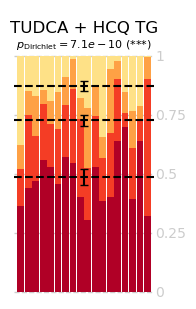

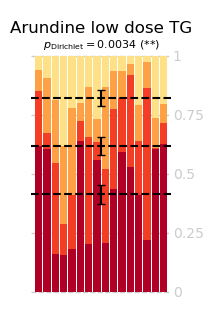

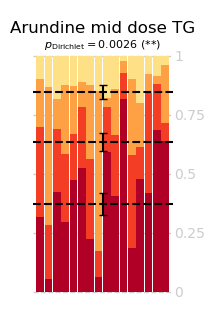

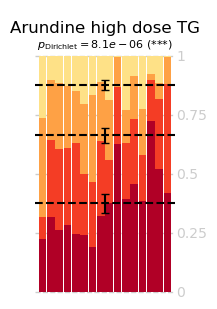

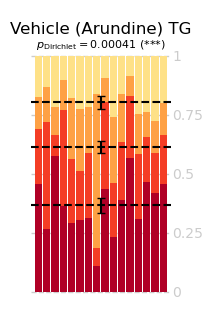

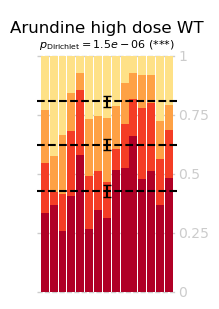

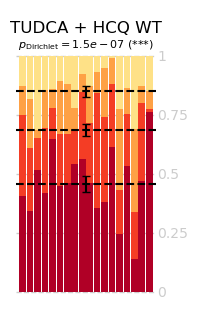

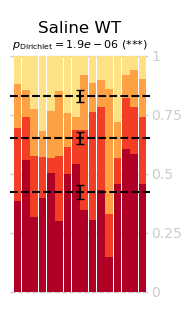

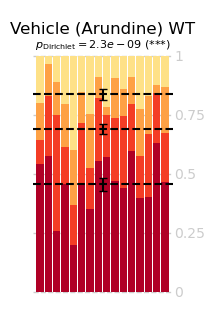

In [8]:
study_plotter(data_CO28154)

In [9]:
def test_same_distro_one(test_cond, ref_cond='Saline TG', data=data_CO26990, study='CO26990'):
    test_data, ref_data = [extract_data4dirichlet(c, data) for c in [test_cond, ref_cond]]
    data_list = [test_data, ref_data, np.concatenate([test_data, ref_data], axis=0)]
    n_list = [d.shape[0] for d in data_list]
    res = dirichlet.test_same_distribution(test_data, ref_data)
    res_unif = dirichlet.test_uniform(test_data)
    #D, p, a_mixed, a_test, a_ref = res
    columns = pd.MultiIndex.from_product([[study], [test_cond]])
    df_LR = pd.DataFrame(np.array(res[:2]), index=pd.MultiIndex.from_product([['LR test'], ['D', 'p']]), columns=columns).transpose()
    df_LR_unif = pd.DataFrame(np.array(res_unif[:2]), index=pd.MultiIndex.from_product([['LR test uniform'], ['D', 'p']]), columns=columns).transpose()
    Z = zip([res[3], res[4], res[2]], [c + ' condition' for c in ['test', 'reference', 'mixed']], n_list)
    def helper(a, c, n):
        ix = pd.MultiIndex.from_product([[c], ['n', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']])
        amle = a
        a = np.array([n] + list(amle))
        val = pd.DataFrame(a, index=ix, columns=columns).transpose().astype({(c, 'n'): 'int64'})
        return(val)
    l = [helper(a, c, n) for a, c, n in Z]
    l = [df_LR] + [df_LR_unif] + l
    df = pd.concat(l, axis=1)
    return(df)


def test_same_distro(comparisons, data=data_CO26990, study='CO26990'):
    test_conditions, ref_conditions = [comparisons[:, i] for i in [0, 1]]
    l = [test_same_distro_one(test_cond, ref_cond, data=data, study=study) for test_cond, ref_cond in zip(test_conditions, ref_conditions)]
    results = pd.concat(l, axis=0)
    Z = zip([study, test_conditions, ref_conditions], ['study', 'test condition', 'reference condition'])
    l = [pd.DataFrame(x, index=results.index, columns=pd.MultiIndex.from_product([['general'], [c]])) for x, c in Z]
    results = pd.concat(l + [results], axis=1)
    return(results)


#test_same_distro_one('Saline WT', 'Saline TG', data=data_CO26990)

comparisons_CO26990 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['Amiloride TG', 'Saline TG'],
])

results_CO26990 = test_same_distro(comparisons_CO26990, data=data_CO26990, study='CO26990')
results_CO26990


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 3.95353
# p-value = 0.266526
# MLE params under null hypothesis (uniformity)           :[1.22772303 1.22772303 1.22772303 1.22772303]
# MLE params under alternative hypothesis                 :[1.5331693  1.46249262 1.42230579 0.95904141]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 14.3782
# p-value = 0.00243308
# MLE params under null hypothesis (uniformity)           :[2.04978545 2.04978545 2.04978545 2.04978545]
# MLE params under alternative hypothesis                 :[4.5717578  2.39881343 2.36860429 2.28969063]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 3.68916
# p-value = 0.297045
# MLE params under null hypothesis (uniformity)           :[1.8048442 1.8048442 1.8048442 1.8048442]
# MLE params under alternative hypothesis                 :[

general                                     \
                        study test condition reference condition   
CO26990 Saline TG     CO26990      Saline TG           Saline TG   
        Saline WT     CO26990      Saline WT           Saline TG   
        Amiloride TG  CO26990   Amiloride TG           Saline TG   

                           LR test           LR test uniform            \
                                 D         p               D         p   
CO26990 Saline TG     2.842171e-14  1.000000        3.953530  0.266526   
        Saline WT     1.215595e+01  0.016228       14.378169  0.002433   
        Amiloride TG  2.855241e+00  0.582335        3.689156  0.297045   

                     test condition                      ...  \
                                  n   alpha_1   alpha_2  ...   
CO26990 Saline TG                16  1.533169  1.462493  ...   
        Saline WT                15  4.571758  2.398813  ...   
        Amiloride TG             12  2.634961  1.959259  ...   

                     reference condition                                \
                                       n   alpha_1   alpha_2   alpha_3   
CO26990 Saline TG                     16  1.533169  1.462493  1.422306   
        Saline WT                     16  1.533169  1.462493  1.422306   
        Amiloride TG                  16  1.533169  1.462493  1.422306   

                               mixed condition                                \
                       alpha_4               n   alpha_1   alpha_2   alpha_3   
CO26990 Saline TG     0.959041              32  1.533169  1.462493  1.422306   
        Saline WT     0.959041              31  2.262327  1.664802  1.630875   
        Amiloride TG  0.959041              28  1.866834  1.611917  1.570699   

                                
                       alpha_4  
CO26990 Saline TG     0.959041  
        Saline WT     1.288817  
        Amiloride TG  1.149556  

[3 rows x 22 columns]

In [10]:
comparisons_CO28152 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['Amiloride TG', 'Saline TG'],
    ['HCQ TG', 'Saline TG'],
    ['HCQ nano TG', 'Saline TG'],
    ['R-HCQ TG', 'Saline TG'],
    ['S-HCQ TG', 'Saline TG'],
    ['TUDCA TG', 'Saline TG'],
    #['Saline WT', 'Saline WT'],
    ['TUDCA WT', 'Saline WT'],
    ['DMSO WT', 'Saline WT'],
])

results_CO28152 = test_same_distro(comparisons_CO28152, data=data_CO28152, study='CO28152')
results_CO28152


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 16.6122
# p-value = 0.000849118
# MLE params under null hypothesis (uniformity)           :[1.54945113 1.54945113 1.54945113 1.54945113]
# MLE params under alternative hypothesis                 :[3.26460961 2.70823708 1.73957974 1.35832802]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 13.3551
# p-value = 0.00392828
# MLE params under null hypothesis (uniformity)           :[1.91281696 1.91281696 1.91281696 1.91281696]
# MLE params under alternative hypothesis                 :[3.75516966 2.44485983 2.48949745 1.67142675]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 20.2777
# p-value = 0.000148667
# MLE params under null hypothesis (uniformity)           :[0.69213269 0.69213269 0.69213269 0.69213269]
# MLE params under alternative hypothesis         

general                                     \
                        study test condition reference condition   
CO28152 Saline TG     CO28152      Saline TG           Saline TG   
        Saline WT     CO28152      Saline WT           Saline TG   
        Amiloride TG  CO28152   Amiloride TG           Saline TG   
        HCQ TG        CO28152         HCQ TG           Saline TG   
        HCQ nano TG   CO28152    HCQ nano TG           Saline TG   
        R-HCQ TG      CO28152       R-HCQ TG           Saline TG   
        S-HCQ TG      CO28152       S-HCQ TG           Saline TG   
        TUDCA TG      CO28152       TUDCA TG           Saline TG   
        TUDCA WT      CO28152       TUDCA WT           Saline WT   
        DMSO WT       CO28152        DMSO WT           Saline WT   

                           LR test           LR test uniform            \
                                 D         p               D         p   
CO28152 Saline TG    -3.854552e-10  1.000000       16.612213  0.000849   
        Saline WT     2.872610e+00  0.579365       13.355138  0.003928   
        Amiloride TG  1.107565e+01  0.025727       20.277732  0.000149   
        HCQ TG        4.338245e+00  0.362161       20.848218  0.000113   
        HCQ nano TG   3.155791e+00  0.532101       12.662144  0.005427   
        R-HCQ TG      1.877268e+01  0.000871        9.316800  0.025362   
        S-HCQ TG      1.236203e+01  0.014853       13.306280  0.004019   
        TUDCA TG      8.879725e-01  0.926280       12.188681  0.006764   
        TUDCA WT      6.657759e+00  0.155118       24.245602  0.000022   
        DMSO WT       7.432604e-01  0.945889       10.797344  0.012874   

                     test condition                      ...  \
                                  n   alpha_1   alpha_2  ...   
CO28152 Saline TG                16  3.264610  2.708237  ...   
        Saline WT                16  3.755170  2.444860  ...   
        Amiloride TG             12  1.746332  1.693532  ...   
        HCQ TG                   16  4.659832  2.332794  ...   
        HCQ nano TG              16  2.756600  2.347722  ...   
        R-HCQ TG                  9  9.771260  9.334317  ...   
        S-HCQ TG                 13  7.684142  5.923297  ...   
        TUDCA TG                 16  2.523713  2.066939  ...   
        TUDCA WT                 15  6.717859  4.334804  ...   
        DMSO WT                  16  4.200465  2.901437  ...   

                     reference condition                               \
                                       n  alpha_1   alpha_2   alpha_3   
CO28152 Saline TG                     16  3.26461  2.708237  1.739580   
        Saline WT                     16  3.26461  2.708237  1.739580   
        Amiloride TG                  16  3.26461  2.708237  1.739580   
        HCQ TG                        16  3.26461  2.708237  1.739580   
        HCQ nano TG                   16  3.26461  2.708237  1.739580   
        R-HCQ TG                      16  3.26461  2.708237  1.739580   
        S-HCQ TG                      16  3.26461  2.708237  1.739580   
        TUDCA TG                      16  3.26461  2.708237  1.739580   
        TUDCA WT                      16  3.75517  2.444860  2.489497   
        DMSO WT                       16  3.75517  2.444860  2.489497   

                               mixed condition                                \
                       alpha_4               n   alpha_1   alpha_2   alpha_3   
CO28152 Saline TG     1.358328              32  3.264618  2.708244  1.739584   
        Saline WT     1.358328              32  3.403157  2.504944  2.020950   
        Amiloride TG  1.358328              28  2.237250  1.997242  1.430413   
        HCQ TG        1.358328              32  3.726683  2.412686  1.849387   
        HCQ nano TG   1.358328              32  2.906460  2.445701  1.961025   
        R-HCQ TG      1.358328              25  3.825186  3.331624  2.455745   
        S-HCQ TG      1.358328

In [11]:
comparisons_CO28154 = np.array([
    ['Saline TG', 'Saline TG'],
    ['Saline WT', 'Saline TG'],
    ['TUDCA + HCQ TG', 'Saline TG'],
    ['Vehicle (Arundine) TG', 'Vehicle (Arundine) TG'],
    ['Arundine low dose TG', 'Vehicle (Arundine) TG'],
    ['Arundine mid dose TG', 'Vehicle (Arundine) TG'],
    ['Arundine high dose TG', 'Vehicle (Arundine) TG'],
    #['Saline WT', 'Saline WT'],
    ['TUDCA + HCQ WT', 'Saline WT'],
    ['Vehicle (Arundine) WT', 'Vehicle (Arundine) WT'],
    ['Arundine high dose WT', 'Vehicle (Arundine) WT'],
])

results_CO28154 = test_same_distro(comparisons_CO28154, data=data_CO28154, study='CO28154')
results_CO28154


Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 19.3693
# p-value = 0.000229301
# MLE params under null hypothesis (uniformity)           :[2.61445932 2.61445932 2.61445932 2.61445932]
# MLE params under alternative hypothesis                 :[6.07356766 4.60731264 3.08143155 2.8750881 ]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 29.3827
# p-value = 1.86084e-06
# MLE params under null hypothesis (uniformity)           :[2.27684923 2.27684923 2.27684923 2.27684923]
# MLE params under alternative hypothesis                 :[7.48306533 4.02937634 3.16485208 2.96577609]

Result of the Dirichlet uniformity test for group None:
# likelihood-ratio statistic (with MWM correction) = 45.5376
# p-value = 7.11211e-10
# MLE params under null hypothesis (uniformity)           :[1.3524912 1.3524912 1.3524912 1.3524912]
# MLE params under alternative hypothesis            

general                         \
                                 study         test condition   
CO28154 Saline TG              CO28154              Saline TG   
        Saline WT              CO28154              Saline WT   
        TUDCA + HCQ TG         CO28154         TUDCA + HCQ TG   
        Vehicle (Arundine) TG  CO28154  Vehicle (Arundine) TG   
        Arundine low dose TG   CO28154   Arundine low dose TG   
        Arundine mid dose TG   CO28154   Arundine mid dose TG   
        Arundine high dose TG  CO28154  Arundine high dose TG   
        TUDCA + HCQ WT         CO28154         TUDCA + HCQ WT   
        Vehicle (Arundine) WT  CO28154  Vehicle (Arundine) WT   
        Arundine high dose WT  CO28154  Arundine high dose WT   

                                                           LR test            \
                                 reference condition             D         p   
CO28154 Saline TG                          Saline TG  2.273737e-13  1.000000   
        Saline WT                          Saline TG  2.663898e+00  0.615547   
        TUDCA + HCQ TG                     Saline TG  9.912195e+00  0.041933   
        Vehicle (Arundine) TG  Vehicle (Arundine) TG  0.000000e+00  1.000000   
        Arundine low dose TG   Vehicle (Arundine) TG  1.466524e+01  0.005448   
        Arundine mid dose TG   Vehicle (Arundine) TG  1.086360e+01  0.028141   
        Arundine high dose TG  Vehicle (Arundine) TG  8.954800e+00  0.062239   
        TUDCA + HCQ WT                     Saline WT  3.207020e+00  0.523798   
        Vehicle (Arundine) WT  Vehicle (Arundine) WT  0.000000e+00  1.000000   
        Arundine high dose WT  Vehicle (Arundine) WT  3.936443e+00  0.414676   

                              LR test uniform               test condition  \
                                            D             p              n   
CO28154 Saline TG                   19.369293  2.293012e-04             15   
        Saline WT                   29.382674  1.860844e-06             16   
        TUDCA + HCQ TG              45.537615  7.112115e-10             18   
        Vehicle (Arundine) TG       18.146774  4.102301e-04             16   
        Arundine low dose TG        13.673979  3.384246e-03             16   
        Arundine mid dose TG        14.253921  2.579127e-03             16   
        Arundine high dose TG       26.346479  8.069936e-06             16   
        TUDCA + HCQ WT              34.627613  1.460157e-07             18   
        Vehicle (Arundine) WT       43.140266  2.297894e-09             16   
        Arundine high dose WT       29.817041  1.507921e-06             15   

                                                   ... reference condition  \
                                alpha_1   alpha_2  ...                   n   
CO28154 Saline TG              6.073568  4.607313  ...                  15   
        Saline WT              7.483065  4.029376  ...                  15   
        TUDCA + HCQ TG         6.715019  3.310035  ...                  15   
        Vehicle (Arundine) TG  6.712883  4.511796  ...                  16   
        Arundine low dose TG   2.892721  1.437736  ...                  16   
        Arundine mid dose TG   3.046380  2.131446  ...                  16   
        Arundine high dose TG  4.614272  3.532139  ...                  16   
        TUDCA + HCQ WT         5.703777  2.874845  ...                  16   
        Vehicle (Arundine) WT  9.890352  5.108655  ...                  16   
        Arundine high dose WT  9.104268  4.234129  ...                  16   

                                                                       \
                                alpha_1   alpha_2   alpha_3   alpha_4   
CO28154 Saline TG              6.073568  4.607313  3.081432  2.875088   
        Saline WT              6.073568  4.607313  3.081432  2.875088   
        TUDCA + HCQ TG         6.073568  4.607313  3.081432  2.875088   
        Vehicle (Arundine) TG  6.712883  4.511796 

In [12]:
l_results = [results_CO26990, results_CO28152, results_CO28154]
results = pd.concat(l_results, axis=0)
results.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-results.csv')

In [13]:
def alpha2fraction(res=results_CO26990):
    conditions = ['test condition', 'reference condition', 'mixed condition']
    def helper(c):
        df = res.xs(c, level=0, axis=1).drop('n', axis=1)
        df = df.apply(lambda r: r / df.sum(axis=1), axis=0)
        columns = pd.MultiIndex.from_product([[c], ['frac_' + str(int(i)) for i in np.arange(4) + 1]])
        df = pd.DataFrame(df.to_numpy(), index=df.index, columns=columns)
        return(df)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)

l_fractions = [alpha2fraction(r) for r in l_results]
fractions = pd.concat(l_fractions, axis=0)
fractions.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-fractions.csv')
fractions

test condition                                \
                                      frac_1    frac_2    frac_3    frac_4   
CO26990 Saline TG                   0.285134  0.271990  0.264516  0.178360   
        Saline WT                   0.393139  0.206281  0.203683  0.196897   
        Amiloride TG                0.325556  0.242072  0.236483  0.195889   
CO28152 Saline TG                   0.359905  0.298568  0.191779  0.149748   
        Saline WT                   0.362435  0.235969  0.240277  0.161320   
        Amiloride TG                0.334362  0.324252  0.260524  0.080863   
        HCQ TG                      0.425611  0.213068  0.194236  0.167085   
        HCQ nano TG                 0.316713  0.269736  0.270454  0.143097   
        R-HCQ TG                    0.285507  0.272740  0.268686  0.173067   
        S-HCQ TG                    0.336523  0.259408  0.226072  0.177998   
        TUDCA TG                    0.349897  0.286568  0.211208  0.152327   
        TUDCA WT                    0.398487  0.257130  0.166254  0.178129   
        DMSO WT                     0.343097  0.236991  0.243469  0.176444   
CO28154 Saline TG                   0.365055  0.276925  0.185211  0.172809   
        Saline WT                   0.424136  0.228383  0.179382  0.168099   
        TUDCA + HCQ TG              0.488306  0.240701  0.144341  0.126652   
        Vehicle (Arundine) TG       0.367598  0.247066  0.190531  0.194805   
        Arundine low dose TG        0.414041  0.205786  0.203968  0.176205   
        Arundine mid dose TG        0.373909  0.261611  0.213312  0.151167   
        Arundine high dose TG       0.376403  0.288130  0.214362  0.121105   
        TUDCA + HCQ WT              0.458653  0.231172  0.162159  0.148015   
        Vehicle (Arundine) WT       0.456554  0.235823  0.146301  0.161322   
        Arundine high dose WT       0.427290  0.198720  0.182858  0.191132   

                              reference condition                      \
                                           frac_1    frac_2    frac_3   
CO26990 Saline TG                        0.285134  0.271990  0.264516   
        Saline WT                        0.285134  0.271990  0.264516   
        Amiloride TG                     0.285134  0.271990  0.264516   
CO28152 Saline TG                        0.359905  0.298568  0.191779   
        Saline WT                        0.359905  0.298568  0.191779   
        Amiloride TG                     0.359905  0.298568  0.191779   
        HCQ TG                           0.359905  0.298568  0.191779   
        HCQ nano TG                      0.359905  0.298568  0.191779   
        R-HCQ TG                         0.359905  0.298568  0.191779   
        S-HCQ TG                         0.359905  0.298568  0.191779   
        TUDCA TG                         0.359905  0.298568  0.191779   
        TUDCA WT                         0.362435  0.235969  0.240277   
        DMSO WT                          0.362435  0.235969  0.240277   
CO28154 Saline TG                        0.365055  0.276925  0.185211   
        Saline WT                        0.365055  0.276925  0.185211   
        TUDCA + HCQ TG                   0.365055  0.276925  0.185211   
        Vehicle (Arundine) TG            0.367598  0.247066  0.190531   
        Arundine low dose TG             0.367598  0.247066  0.190531   
        Arundine mid dose TG             0.367598  0.247066  0.190531   
        Arundine high dose TG            0.367598  0.247066  0.190531   
        TUDCA + HCQ WT                   0.424136  0.228383  0.179382   
        Vehicle (Arundine) WT            0.456554  0.235823  0.146301   
        Arundine high dose WT            0.456554  0.235823  0.146301   

                                        mixed condition                      \
                                 frac_4          frac_1    frac_2    frac_3   
CO26990 Saline TG              0.178360        0.285134  0.271990  0.264516   
        Saline W

In [14]:
def alpha2stdev(res=results_CO26990, get_variance=False):
    conditions = ['test condition', 'reference condition', 'mixed condition']
    def helper(c):
        def get_sdev(r, i):
            amle = r.drop('n').to_numpy()
            n = r.loc['n']
            vararray = 1. / ((polygamma(1, amle) - polygamma(1, amle.sum())) * n)
            yerr = np.sqrt(vararray) / np.sum(amle)
            a = vararray if get_variance else yerr
            val = a[i]
            #val = pd.DataFrame(a, index=['1', '2', '3', '4'], columns=r.index).transpose()
            return(val)
        df = res.xs(c, level=0, axis=1)
        l = [df.apply(lambda r: get_sdev(r, i), axis=1) for i in range(4)]
        df = pd.concat(l, axis=1)
        df.columns = pd.MultiIndex.from_product([[c], ['err_' + str(int(i)) for i in np.arange(4) + 1]])
        return(df)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)

stdeviations, variances = [pd.concat([alpha2stdev(r, get_variance=b) for r in l_results], axis=0) for b in [False, True]]
stdeviations.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-stdeviations.csv')
variances.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-variances.csv')
stdeviations

test condition                                \
                                       err_1     err_2     err_3     err_4   
CO26990 Saline TG                   0.055424  0.053242  0.052002  0.037408   
        Saline WT                   0.056471  0.034032  0.033717  0.032890   
        Amiloride TG                0.062191  0.048977  0.048088  0.041538   
CO28152 Saline TG                   0.056096  0.048047  0.034095  0.028252   
        Saline WT                   0.053483  0.038037  0.038562  0.028645   
        Amiloride TG                0.074177  0.072190  0.059783  0.021849   
        HCQ TG                      0.060251  0.034517  0.032234  0.028854   
        HCQ nano TG                 0.051211  0.045002  0.045097  0.027618   
        R-HCQ TG                    0.034850  0.033721  0.033363  0.024800   
        S-HCQ TG                    0.039574  0.032567  0.029554  0.025110   
        TUDCA TG                    0.059785  0.050545  0.039574  0.030552   
        TUDCA WT                    0.048585  0.034401  0.025291  0.026526   
        DMSO WT                     0.047666  0.035785  0.036510  0.028853   
CO28154 Saline TG                   0.045372  0.036544  0.027399  0.026113   
        Saline WT                   0.048704  0.029995  0.025338  0.024231   
        TUDCA + HCQ TG              0.058745  0.032576  0.022591  0.020584   
        Vehicle (Arundine) TG       0.042385  0.031266  0.026044  0.026446   
        Arundine low dose TG        0.070404  0.039149  0.038874  0.034607   
        Arundine mid dose TG        0.060489  0.044989  0.038345  0.029369   
        Arundine high dose TG       0.051486  0.041462  0.033218  0.021956   
        TUDCA + HCQ WT              0.057713  0.032920  0.025451  0.023832   
        Vehicle (Arundine) WT       0.047451  0.028080  0.020300  0.021667   
        Arundine high dose WT       0.046457  0.025943  0.024516  0.025263   

                              reference condition                      \
                                            err_1     err_2     err_3   
CO26990 Saline TG                        0.055424  0.053242  0.052002   
        Saline WT                        0.055424  0.053242  0.052002   
        Amiloride TG                     0.055424  0.053242  0.052002   
CO28152 Saline TG                        0.056096  0.048047  0.034095   
        Saline WT                        0.056096  0.048047  0.034095   
        Amiloride TG                     0.056096  0.048047  0.034095   
        HCQ TG                           0.056096  0.048047  0.034095   
        HCQ nano TG                      0.056096  0.048047  0.034095   
        R-HCQ TG                         0.056096  0.048047  0.034095   
        S-HCQ TG                         0.056096  0.048047  0.034095   
        TUDCA TG                         0.056096  0.048047  0.034095   
        TUDCA WT                         0.053483  0.038037  0.038562   
        DMSO WT                          0.053483  0.038037  0.038562   
CO28154 Saline TG                        0.045372  0.036544  0.027399   
        Saline WT                        0.045372  0.036544  0.027399   
        TUDCA + HCQ TG                   0.045372  0.036544  0.027399   
        Vehicle (Arundine) TG            0.042385  0.031266  0.026044   
        Arundine low dose TG             0.042385  0.031266  0.026044   
        Arundine mid dose TG             0.042385  0.031266  0.026044   
        Arundine high dose TG            0.042385  0.031266  0.026044   
        TUDCA + HCQ WT                   0.048704  0.029995  0.025338   
        Vehicle (Arundine) WT            0.047451  0.028080  0.020300   
        Arundine high dose WT            0.047451  0.028080  0.020300   

                                        mixed condition                      \
                                  err_4           err_1     err_2     err_3   
CO26990 Saline TG              0.037408        0.039191  0.037648  0.036771   
        Saline W

In [15]:
def fraction2entropy(frac):
    conditions = frac.columns.get_level_values(0).unique()
    def helper(c):
        df = frac.xs(c, level=0, axis=1)
        entropy = df.apply(scipy.stats.dirichlet.entropy, axis=1).to_frame(c)
        return(entropy)
    l = [helper(c) for c in conditions]
    val = pd.concat(l, axis=1)
    return(val)
        
entropies = pd.concat([fraction2entropy(f) for f in l_fractions], axis=0)
entropies['information gain'] = entropies['reference condition'] - entropies['test condition']
entropies['information gain uniform'] = scipy.stats.dirichlet.entropy(np.ones(4) / 4) - entropies['test condition']
entropies.to_csv('../../results/2024-06-26-mwm-test-probe-CO28154/dirichlet-mle-entropies.csv')
entropies

test condition  reference condition  \
CO26990 Saline TG                   -6.312079            -6.312079   
        Saline WT                   -7.023390            -6.312079   
        Amiloride TG                -6.276764            -6.312079   
CO28152 Saline TG                   -7.613508            -7.613508   
        Saline WT                   -7.014572            -7.613508   
        Amiloride TG               -11.590788            -7.613508   
        HCQ TG                      -7.734905            -7.613508   
        HCQ nano TG                 -7.201482            -7.613508   
        R-HCQ TG                    -6.400899            -7.613508   
        S-HCQ TG                    -6.574861            -7.613508   
        TUDCA TG                    -7.278899            -7.613508   
        TUDCA WT                    -7.609499            -7.014572   
        DMSO WT                     -6.611249            -7.014572   
CO28154 Saline TG                   -7.172583            -7.172583   
        Saline WT                   -7.811523            -7.172583   
        TUDCA + HCQ TG             -10.311931            -7.172583   
        Vehicle (Arundine) TG       -6.822452            -6.822452   
        Arundine low dose TG        -7.445112            -6.822452   
        Arundine mid dose TG        -7.413518            -6.822452   
        Arundine high dose TG       -8.559987            -6.822452   
        TUDCA + HCQ WT              -8.862336            -7.811523   
        Vehicle (Arundine) WT       -8.896392            -8.896392   
        Arundine high dose WT       -7.639803            -8.896392   

                               mixed condition  information gain  \
CO26990 Saline TG                    -6.312079          0.000000   
        Saline WT                    -6.378774          0.711311   
        Amiloride TG                 -6.252004         -0.035315   
CO28152 Saline TG                    -7.613510          0.000000   
        Saline WT                    -7.197325         -0.598936   
        Amiloride TG                 -9.036091          3.977280   
        HCQ TG                       -7.496697          0.121397   
        HCQ nano TG                  -7.243684         -0.412026   
        R-HCQ TG                     -7.038645         -1.212610   
        S-HCQ TG                     -7.104295         -1.038647   
        TUDCA TG                     -7.428619         -0.334609   
        TUDCA WT                     -7.124821          0.594927   
        DMSO WT                      -6.804605         -0.403323   
CO28154 Saline TG                    -7.172583          0.000000   
        Saline WT                    -7.429102          0.638940   
        TUDCA + HCQ TG               -8.548975          3.139348   
        Vehicle (Arundine) TG        -6.822452          0.000000   
        Arundine low dose TG         -7.088139          0.622661   
        Arundine mid dose TG         -7.064051          0.591066   
        Arundine high dose TG        -7.434408          1.737536   
        TUDCA + HCQ WT               -8.339392          1.050813   
        Vehicle (Arundine) WT        -8.896392          0.000000   
        Arundine high dose WT        -8.155713         -1.256589   

                               information gain uniform  
CO26990 Saline TG                              0.513456  
        Saline WT                              1.224767  
        Amiloride TG                           0.478140  
CO28152 Saline TG                              1.814885  
        Saline WT                              1.215949  
        Amiloride TG                           5.792165  
        HCQ TG                                 1.936282  
        HCQ nano TG                            1.402858  
        R-HCQ TG                               0.602275  
        S-HCQ TG                               0.776237  
        TUDCA TG                               1.480276  
        TUDCA WT     

In [16]:
l_all = [results, fractions, stdeviations, entropies]
d_sel = {
    'CO26990': ['Amiloride TG', 'Saline WT'],
    'CO28154': ['TUDCA + HCQ TG	', 'Arundine low dose TG', 'Saline WT'],
}


/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-all.png', 'named-figure/plotall-all.pdf']

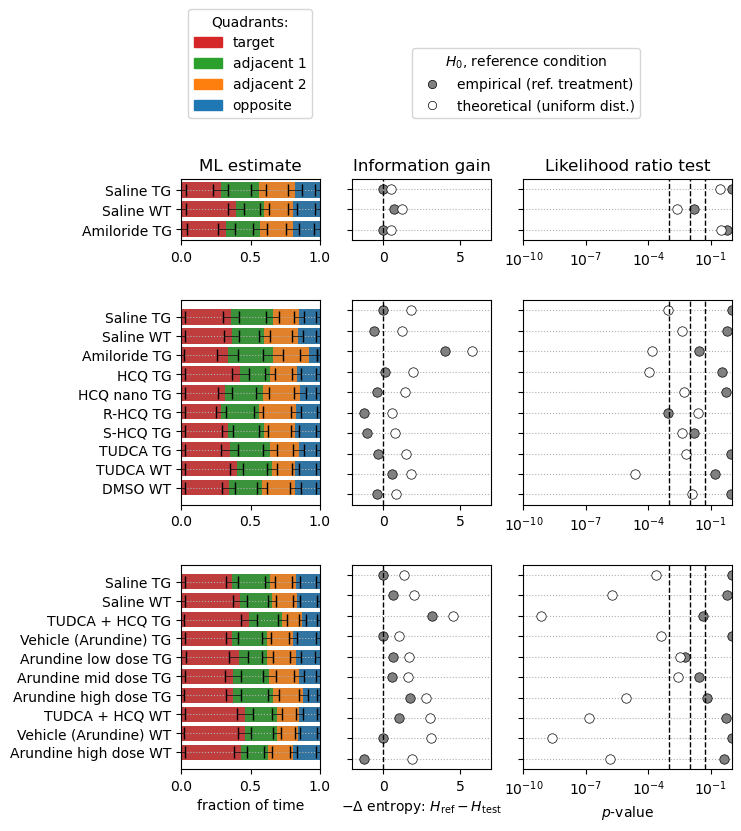

In [17]:
def info_plot(axi, entropies):
    data = entropies.copy()
    data.loc[:, 'treatment'] = data.index
    def helper(axi, x, markerfacecolor):
        axi = sns.pointplot(data=data, y='treatment', x=x, ax=axi, linestyles='none', markeredgewidth=0.5, markeredgecolor='k', markerfacecolor=markerfacecolor)
        return(axi)
    axi = helper(axi, 'information gain', 'gray')
    axi = helper(axi, 'information gain uniform', 'white')
    axi.axvline(0, color='k', linewidth=1, linestyle='--')
    axi.set_title('Information gain')
    axi.set_xlabel(r'$-\Delta$ entropy: $H_\mathrm{ref} - H_\mathrm{test}$')
    return(axi)


def frac_plot(axi, fractions, stdeviations):
    cumfrac = fractions.xs('test condition', level=0, axis=1).cumsum(axis=1).copy()
    stdev = stdeviations.xs('test condition', level=0, axis=1).copy()
    cumfrac.loc[:, 'treatment'] = cumfrac.index
    for i in list(range(cumfrac.shape[1]))[3::-1]:
        axi = sns.barplot(data=cumfrac, y='treatment', x=cumfrac.columns[i], ax=axi)
        x = cumfrac.columns[i]
        xerr = stdev.loc[:, x.replace('frac', 'err')]
        y = np.arange(len(cumfrac[x]))
        def my_errorbar(x, xerr):
            axi.errorbar(y=y, x=x, xerr=xerr, color='k', linestyle='none', capsize=4, linewidth=0.5)
        my_errorbar(cumfrac.loc[:, x], xerr)
    my_errorbar(np.zeros_like(y), stdev.loc[:, 'err_4'])
    axi.set_xlabel('fraction of time')
    axi.set_xlim(0, 1)
    axi.set_title('ML estimate')
    return(axi)


def pval_plot(axi, results):
    def helper(axi, test_type='LR test', markerfacecolor='gray'):
        data = results.xs(test_type, level=0, axis=1).copy()
        data.loc[:, 'treatment'] = data.index
        axi = sns.pointplot(data=data, y='treatment', x='p', ax=axi, linestyles='none', markeredgewidth=0.5, markeredgecolor='k', markerfacecolor=markerfacecolor)
        return(axi)
    axi = helper(axi, 'LR test', 'gray')
    axi = helper(axi, 'LR test uniform', 'white')
    axi.set_xscale('log')
    axi.set_xlabel(r'$p$-value')
    axi.set_title('Likelihood ratio test')
    for alpha in [1e-3, 1e-2, 5e-2]:
        axi.axvline(alpha, color='k', linewidth=1, linestyle='--')
    return(axi)


def quadrant_legend(fig, bbox_x=0.05, bbox_y=None, loc='lower left'):
    handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]
    labels = ['target', 'adjacent 1', 'adjacent 2', 'opposite']
    #bbox_y = 1 if bbox_y is None else bbox_y
    fig.legend(handles=handles, labels=labels, loc=loc, bbox_to_anchor=(bbox_x, bbox_y), title='Quadrants:')


def plot_all(l_all, d_sel=None, info_xlims=None, p_xlims=None, hspace_denom=None, bbox_y=None, ref_treatment=None):
    d_plot = {'fractions': frac_plot, 'information': info_plot, 'p-value': pval_plot}
    if d_sel is None:
        df = l_all[0]
        d_sel = {s: df.xs(s, level=0, axis=0).index.to_list() for s in df.index.get_level_values(0).unique()}
    height_ratios = [len(v) for v in d_sel.values()]
    width_ratios = [2, 2, 3]
    hspace_denom = 40 if hspace_denom is None else hspace_denom
    gridspec_kw = {'left': 0.05, 'right': 0.48, 'hspace': sum(height_ratios) / hspace_denom}
    figsize = (12.8, sum(height_ratios) / 3)
    fig, ax = plt.subplots(len(height_ratios), len(width_ratios), height_ratios=height_ratios, width_ratios=width_ratios,
                           figsize=figsize, gridspec_kw=gridspec_kw, squeeze=False)
    mins = [0, 0, 1]
    maxs = [1, 0, 1e-6]
    for i, items in enumerate(d_sel.items()):
        study, l_exper = items
        results, fractions, stdeviations, entropies = [df.xs(study, level=0, axis=0).loc[l_exper] for df in l_all]
        d_args = {'fractions': (fractions, stdeviations), 'information': (entropies,), 'p-value': (results,)}
        for j, plot_type in enumerate(['fractions', 'information', 'p-value']):
            axi = ax[i, j]
            plotter = d_plot[plot_type]
            args = d_args[plot_type]
            axi = plotter(axi, *args)
            axi.set_ylabel('')
            axi.grid(axis='y', linestyle='dotted')
            if info_xlims is not None and plot_type == 'information':
                axi.set_xlim(info_xlims)
            if p_xlims is not None and plot_type == 'p-value':
                axi.set_xlim(p_xlims)
            if j > 0:
                axi.set_ylabel('')
                axi.set_yticklabels([])
            if i < len(d_sel) - 1:
                axi.set_xlabel('')
            if i > 0:
                axi.set_title('')
    bbox_y = 1 if bbox_y is None else bbox_y
    legend = quadrant_legend(fig, bbox_y=bbox_y)
    handles1 = [mlines.Line2D([], [], linestyle='none', markeredgewidth=0.5, marker='o', markerfacecolor=c, markeredgecolor='k') for c in ['gray', 'white']]
    ref_treatment = 'ref. treatment' if ref_treatment is None else ref_treatment
    labels1 = ['empirical (' + ref_treatment + ')', 'theoretical (uniform dist.)']
    title1 = r'$H_0$, reference condition'
    fig.legend(handles=handles1, labels=labels1, loc='lower left', bbox_to_anchor=(0.225, bbox_y), title=title1)
    return((fig, ax))


fig, ax = plot_all(l_all, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=60, bbox_y=0.95)
attila_utils.savefig(fig, 'plotall-all')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-CO26990-CO28152.png',
 'named-figure/plotall-CO26990-CO28152.pdf']

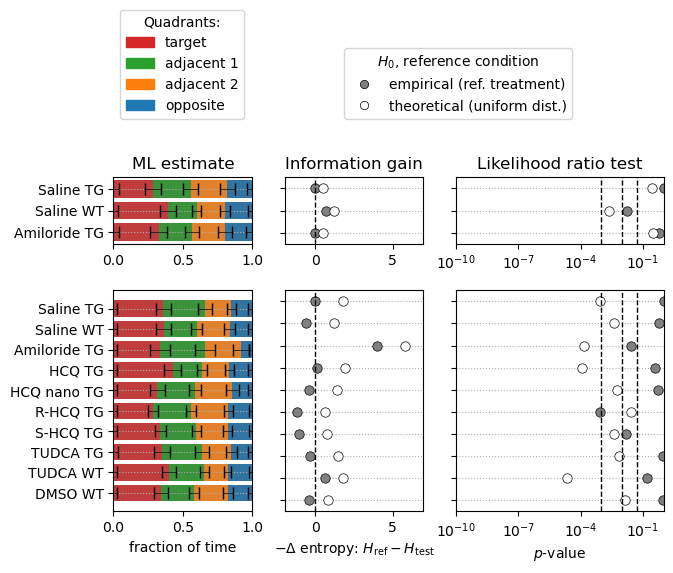

In [18]:
d_sel = {
    'CO26990': results.xs('CO26990').index.to_list(),
    'CO28152': results.xs('CO28152').index.to_list(),
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=40)
attila_utils.savefig(fig, 'plotall-CO26990-CO28152')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-CO28154.png', 'named-figure/plotall-CO28154.pdf']

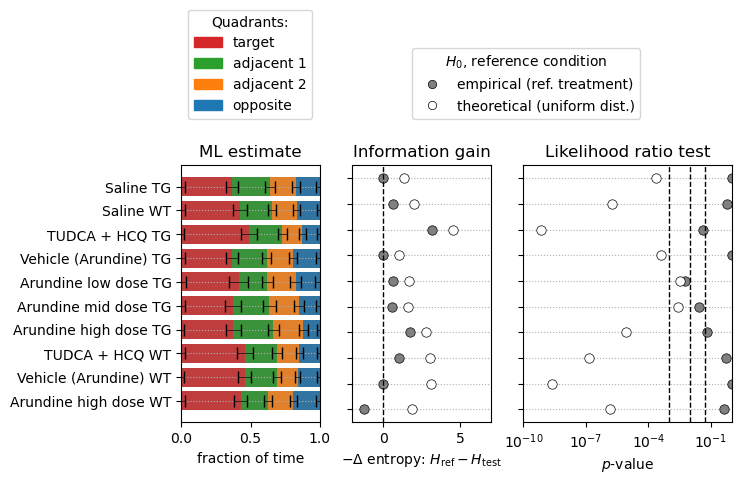

In [19]:
d_sel = {
    'CO28154': results.xs('CO28154').index.to_list(),
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1))
attila_utils.savefig(fig, 'plotall-CO28154')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-arundine.png', 'named-figure/plotall-arundine.pdf']

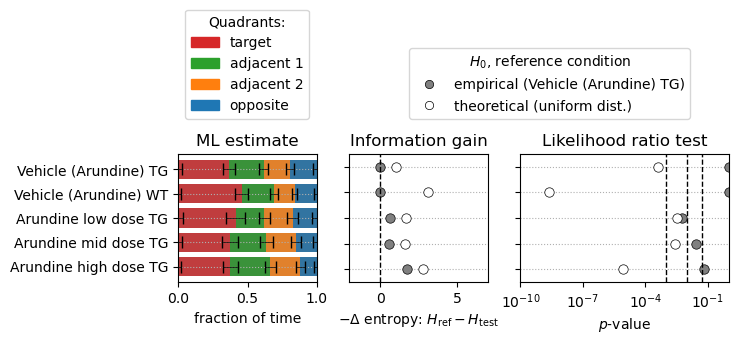

In [20]:
d_sel = {
    'CO28154': ['Vehicle (Arundine) TG', 'Vehicle (Arundine) WT', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG'],
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Vehicle (Arundine) TG', bbox_y=1.05)
attila_utils.savefig(fig, 'plotall-arundine')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-arundine-wt.png',
 'named-figure/plotall-arundine-wt.pdf']

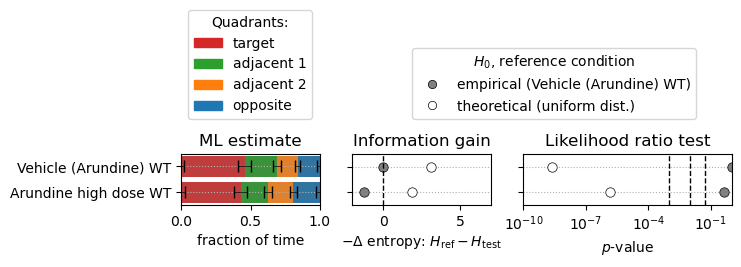

In [21]:
d_sel = {
    'CO28154': ['Vehicle (Arundine) WT', 'Arundine high dose WT'],
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Vehicle (Arundine) WT', bbox_y=1.3)
attila_utils.savefig(fig, 'plotall-arundine-wt')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/plotall-TUDCA-HCQ.png', 'named-figure/plotall-TUDCA-HCQ.pdf']

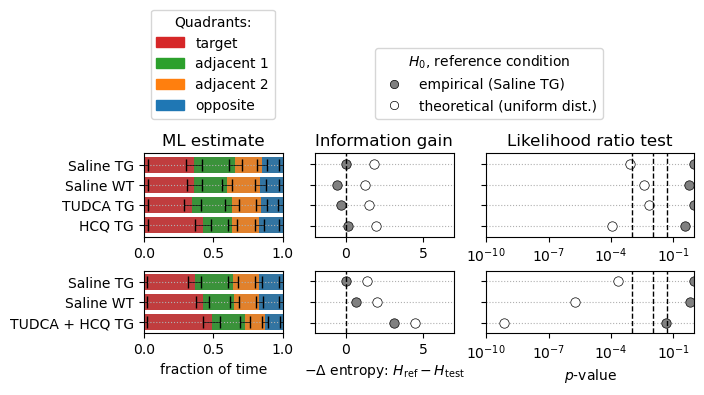

In [22]:
d_sel = {
    'CO28152': ['Saline TG', 'Saline WT', 'TUDCA TG', 'HCQ TG'],
    'CO28154': ['Saline TG', 'Saline WT', 'TUDCA + HCQ TG'],
}

fig, ax = plot_all(l_all, d_sel=d_sel, info_xlims=(-2, 7), p_xlims=(1e-10, 1), hspace_denom=15, ref_treatment='Saline TG')
attila_utils.savefig(fig, 'plotall-TUDCA-HCQ')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_99504/2968768464.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(edgecolor=c, color=c) for c in ['C3', 'C2', 'C1', 'C0']]


['named-figure/pie-chart-wt-tg-uniform.png',
 'named-figure/pie-chart-wt-tg-uniform.pdf']

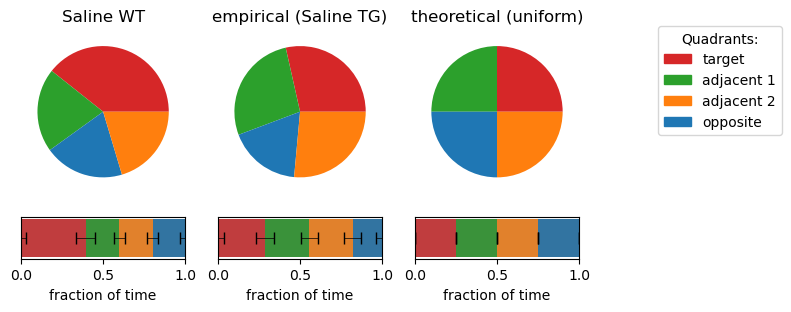

In [23]:
def plot_pie_strip(l_sel, fractions=fractions, stdeviations=stdeviations):
    unit_width = 2.4
    fig, ax = plt.subplots(2, len(l_sel), height_ratios=[4, 1], figsize=(unit_width * len(l_sel), unit_width * 1.25))
    Z = zip([fractions, stdeviations], [1/4, 0])
    uniform_fractions, uniform_stdeviations = [df.iloc[[0], :4].copy().map(lambda x: val) for df,val in Z]
    def plot_one(j, t):
        ii = np.array([0, 1, 3, 2])
        if t is None:
            frac, sdev = [df.iloc[0].loc['test condition'].to_numpy() for df in [uniform_fractions, uniform_stdeviations]]
        else:
            frac, sdev = [df.loc[t].loc['test condition'].to_numpy() for df in [fractions, stdeviations]]
        frac_pie = frac[ii]
        colors = ['C' + str(int(i)) for i in np.array(3 - ii)]
        ax_top, ax_bottom = [ax[i, j] for i in [0, 1]]
        ax_top.pie(frac_pie, colors=colors)
        ix = pd.MultiIndex.from_product([['test condition'], list(range(4))])
        #fracdf, sdevdf = [pd.DataFrame(a, columns=[t[1]], index=ix).transpose() for a in [frac, sdev]]
        fracdf = fractions.loc[[t]].copy() if t is not None else uniform_fractions.copy()
        fracdf.index = fracdf.index.get_level_values(1)
        sdevdf = stdeviations.loc[[t]].copy() if t is not None else uniform_stdeviations.copy()
        sdevdf.index = sdevdf.index.get_level_values(1)
        if t is None:
            pass
        ax_bottom = frac_plot(ax_bottom, fracdf, sdevdf)
        ax_bottom.set_title('')
        ax_bottom.set_ylabel('')
        ax_bottom.set_yticks([])
        return(None)
    for j, t in enumerate(l_sel):
        plot_one(j, t)
    legend = quadrant_legend(fig, bbox_x=1, bbox_y=0.5)
    return((fig, ax))

l_sel = [
    ('CO26990', 'Saline WT'),
    ('CO26990', 'Saline TG'),
    None,
]

fig, ax = plot_pie_strip(l_sel, fractions)
for axi, title in zip(ax[0, :], ['Saline WT', 'empirical (Saline TG)', 'theoretical (uniform)']):
    axi.set_title(title)

attila_utils.savefig(fig, 'pie-chart-wt-tg-uniform')

In [24]:
%connect_info

{
  "shell_port": 56898,
  "iopub_port": 56899,
  "stdin_port": 56900,
  "control_port": 56902,
  "hb_port": 56901,
  "ip": "127.0.0.1",
  "key": "43efdb21-58715e0e4942bae0adc6fa77",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-06-26-mwm-test-probe-CO28154/2024-06-26-mwm-test-probe-CO28154.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-93928680-2171-421e-8f7a-e36e54178478.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
